# Web Scrapping

#Extraindo os dados da Wikipédia

In [ ]:
from bs4 import BeautifulSoup            # Importa a biblioteca para parsear o HTML da página
import pandas as pd                      # Importa o pandas para trabalhar com tabelas (DataFrame)
import matplotlib.pyplot as plt          # Importa o matplotlib para criar gráficos

def func_le_paises():                    # Define a função que vai ler os dados de países a partir da Wikipedia
  bs = le_site('https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_riqueza_total')
                                         # Chama a função 'le_site' (definida em outro lugar) para obter o conteúdo HTML da página

  table = bs.find('table', style='text-align: right')
                                         # Procura uma tabela no HTML que tenha o estilo 'text-align: right'
  if (table == None):                    # Se não encontrar a tabela...
    raise Exception("Table não encontrada")
                                         # ...lança uma exceção com a mensagem de erro

  corpo = table.find("tbody")            # Dentro da tabela, busca o corpo onde estão as linhas
  if (corpo == None):                    # Se o corpo da tabela não for encontrado...
    raise Exception("Corpo da tabela não encontrado")
                                         # ...lança uma exceção informando o problema

  items = corpo.find_all('tr')           # Busca todas as linhas (tags <tr>) da tabela

  paises = []                            # Cria uma lista vazia para armazenar os dados dos países
  for item in items:                     # Para cada linha da tabela...
    dados = item.find_all('td')          # ...pega todas as células da linha (tags <td>)
    item_pais = []                       # Cria uma lista temporária para armazenar os dados da linha atual
    for dado in dados:                   # Para cada célula...
      item_pais.append(dado.text.replace('\xa0',''))
                                         # ...adiciona o texto da célula (limpando o caractere especial \xa0)

    if len(item_pais) > 0:               # Se a linha tiver dados (não estiver vazia)...
      paises.append(item_pais)           # ...adiciona os dados do país à lista final

  return paises                          # Retorna a lista com todos os países e seus dados


In [ ]:
func_le_paises()

[['—', 'Mundo', '317.084\n'],
 ['—', 'América do Norte', '106.513\n'],
 ['—', 'Ásia', '105.946\n'],
 ['1', 'Estados Unidos', '98.154\n'],
 ['—', 'Europa', '85.402\n'],
 ['2', 'China', '51.874\n'],
 ['3', 'Japão', '23.884\n'],
 ['4', 'Alemanha', '14.499\n'],
 ['5', 'Reino Unido', '14.209\n'],
 ['6', 'França', '13.883\n'],
 ['7', 'Itália', '10.569\n'],
 ['—', 'Oceania', '8.615\n'],
 ['8', 'Canadá', '8.319\n'],
 ['—', 'América Latina', '8.055\n'],
 ['9', 'Austrália', '7.577\n'],
 ['10', ' Espanha', '7.152\n'],
 ['11', 'Coreia do Sul', '7.107\n'],
 ['12', 'Índia', '5.972\n'],
 ['13', ' Taiwan[4]', '4.065\n'],
 ['14', ' Suíça', '3.611\n'],
 ['15', 'Países Baixos', '3.357\n'],
 ['16', 'Bélgica', '2.776\n'],
 ['—', 'África', '2.553\n'],
 ['17', 'Brasil', '2.464\n'],
 ['18', 'Rússia', '2.240\n'],
 ['19', 'Suécia', '1.920\n'],
 ['20', 'México', '1.729\n'],
 ['21', 'Áustria', '1.637\n'],
 ['22', 'Hong Kong[5]', '1.523\n'],
 ['23', ' Indonésia', '1.518\n'],
 ['24', 'Singapura', '1.289\n'],
 ['25'

In [ ]:
data = pd.DataFrame(func_le_paises(), columns=['Posição','País','Riqueza Total por Bilhões (USD)'])
data.set_index('Posição')

,País,Riqueza Total por Bilhões (USD)
Posição,,
—,Mundo,317.084\n
—,América do Norte,106.513\n
—,Ásia,105.946\n
1,Estados Unidos,98.154\n
—,Europa,85.402\n
...,...,...
96,Nepal,35\n
97,Ilhas Maurícias,34\n
98,Costa do Marfim,34\n


# Gráfico dos top 20 países com maior riqueza total

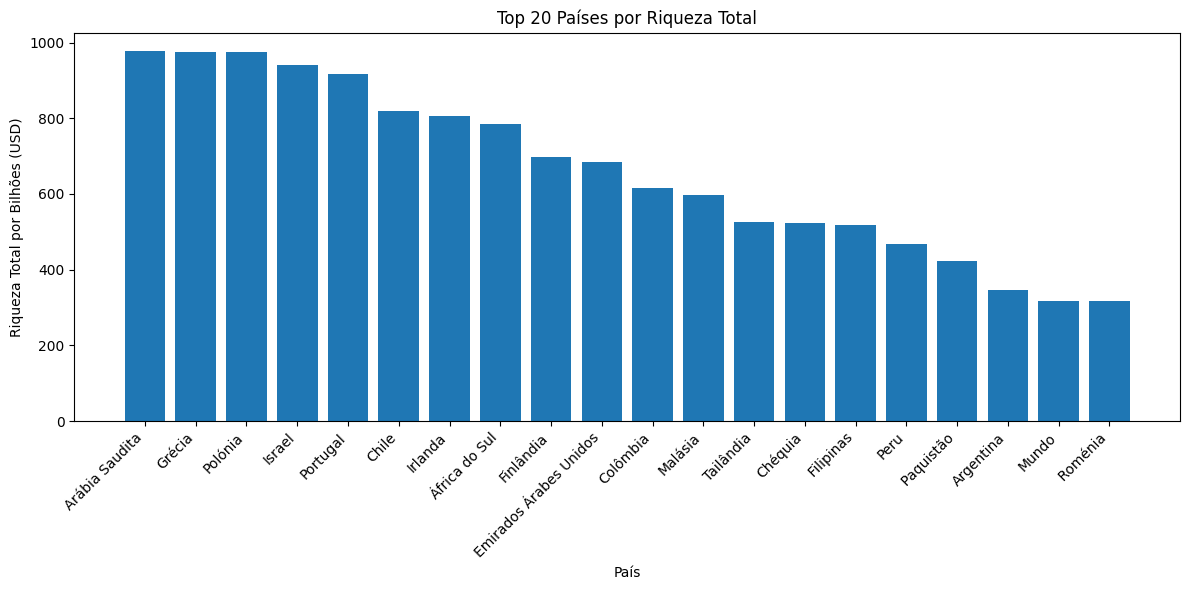

In [ ]:
# Converte a coluna 'Riqueza Total por Bilhões (USD)' para formato numérico, tratando possíveis erros
data['Riqueza Total por Bilhões (USD)'] = pd.to_numeric(data['Riqueza Total por Bilhões (USD)'], errors='coerce')

# Remove linhas onde a conversão falhou
data.dropna(subset=['Riqueza Total por Bilhões (USD)'], inplace=True)

# Ordena os dados para melhor visualização
data_sorted = data.sort_values('Riqueza Total por Bilhões (USD)', ascending=False)

# Seleciona os top N países para exibir
top_n = 20
data_top = data_sorted.head(top_n)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(data_top['País'], data_top['Riqueza Total por Bilhões (USD)'])
plt.xlabel('País')
plt.ylabel('Riqueza Total por Bilhões (USD)')
plt.title(f'Top {top_n} Países por Riqueza Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de rótulos
plt.show()
